In [ ]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
seed = 42
rng = np.random.default_rng(seed = seed)

In [ ]:
(train_x, train_y), (test_x, test_y) = mnist.load_data()
print(train_x.shape,test_x.shape)
X_train = train_x.reshape(train_x.shape[0], -1)#-1 in the second dimension is a placeholder
X_test = test_x.reshape(test_x.shape[0], 28*28) # transforms from a shape of (60000, 28, 28) into a shape of (60000, 784)
print(X_train.shape,X_test.shape)
X_train = X_train/255
X_test = X_test/255
def hot_encoding(y,k):
  y_one_hot = np.zeros((y.shape[0],k))
  y_one_hot[np.arange(y.shape[0]),y] = 1
  return y_one_hot

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28) (10000, 28, 28)
(60000, 784) (10000, 784)


In [ ]:
def linear_combination(X,w,b):
  return X@w +b
def softmax(z):
  exp = np.exp(z -np.max(z))
  for i in range(len(z)):
    exp[i] /= np.sum(exp[i])
  return exp
def ReLu(z):
    #return np.tanh(z)
   return np.maximum(0,z)
def ReLu_derivative(z):
  #return 1 - np.tanh(z)**2
   return (z>0).astype(int)
def initialize_parameters(input_size, hidden_size, output_size):
  w1 = np.random.randn(input_size, hidden_size)* np.sqrt(2. / input_size)
  b1 = np.zeros(hidden_size)
  w2 = np.random.randn(hidden_size, output_size)* np.sqrt(2. / input_size)
  b2 = np.zeros(output_size)
  return w1, b1, w2, b2

def forward(X, w1, b1, w2, b2):
  z1 = linear_combination(X, w1, b1)
  a1 = ReLu(z1)
  z2 = linear_combination(a1, w2, b2)
  a2 = softmax(z2)
  return z1, a1, z2, a2

def backPro(X, y_hot, z1, a1, z2, a2, w2):
   m = X.shape[0]
   dz2 = a2 - y_hot
   dw2 = (1/m)*a1.T@dz2
   db2 = (1/m)*np.sum(dz2,axis=0)
   da1 = dz2@w2.T
   dz1 = da1*ReLu_derivative(z1)
   dw1 = (1/m)*X.T@dz1
   db1 = (1/m)*np.sum(dz1,axis=0)
   return dw1, db1, dw2, db2

def update_parameters(w1, b1, w2, b2, dw1, db1, dw2, db2, alpha):
     w1 = w1 - alpha*dw1
     b1 = b1 - alpha*db1
     w2 = w2 - alpha*dw2
     b2 = b2 - alpha*db2
     return w1, b1, w2, b2

import numpy as np

def gradient_des_mini_batch(X, y, epoch, alpha, output_size, batch_size):
    input_size = X.shape[1]
    hidden_size = 256
    y_hot = hot_encoding(y, output_size)

    w1, b1, w2, b2 = initialize_parameters(input_size, hidden_size, output_size) # Use your preferred initialization

    m = X.shape[0]

    for i in range(epoch):
        # Shuffle the data at the beginning of each epoch
        permutation = np.random.permutation(m)
        shuffled_X = X[permutation, :]
        shuffled_y_hot = y_hot[permutation, :]

        # Iterate through mini-batches
        for j in range(0, m, batch_size):
            X_batch = shuffled_X[j : j + batch_size, :]
            y_batch_hot = shuffled_y_hot[j : j + batch_size, :]

            # Forward pass on the mini-batch
            z1, a1, z2, a2 = forward(X_batch, w1, b1, w2, b2)

            # Backpropagation on the mini-batch
            dw1, db1, dw2, db2 = backPro(X_batch, y_batch_hot, z1, a1, z2, a2, w2)

            # Update parameters using gradients from the mini-batch
            w1, b1, w2, b2 = update_parameters(w1, b1, w2, b2, dw1, db1, dw2, db2, alpha)

        # Optional: Print loss or accuracy after each epoch (requires calculating loss)
        # You would need a separate function to calculate the loss (e.g., cross-entropy loss)

    return w1, b1, w2, b2

# Example of how to call the function with a batch size
# w1, b1, w2, b2 = gradient_des_mini_batch(X_train, train_y, 50, 0.01, 10, batch_size=64)

w1,b1,w2,b2 = gradient_des_mini_batch(X_train,train_y,60,0.08,10,128)

In [ ]:
def predict(X, w1, b1, w2, b2):
  z1, a1, z2, a2 = forward(X, w1, b1, w2, b2)
  return np.argmax(a2,axis=1)

from sklearn.metrics import classification_report
y_pred = predict(X_test, w1, b1, w2, b2)
print(classification_report(test_y,y_pred))
def accuracy(y_true, y_pred):
  return np.mean(y_true == y_pred)

print("Accuracy:", accuracy(test_y, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.99      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.98      0.98       892
           6       0.98      0.98      0.98       958
           7       0.99      0.98      0.98      1028
           8       0.97      0.98      0.97       974
           9       0.98      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

Accuracy: 0.9814


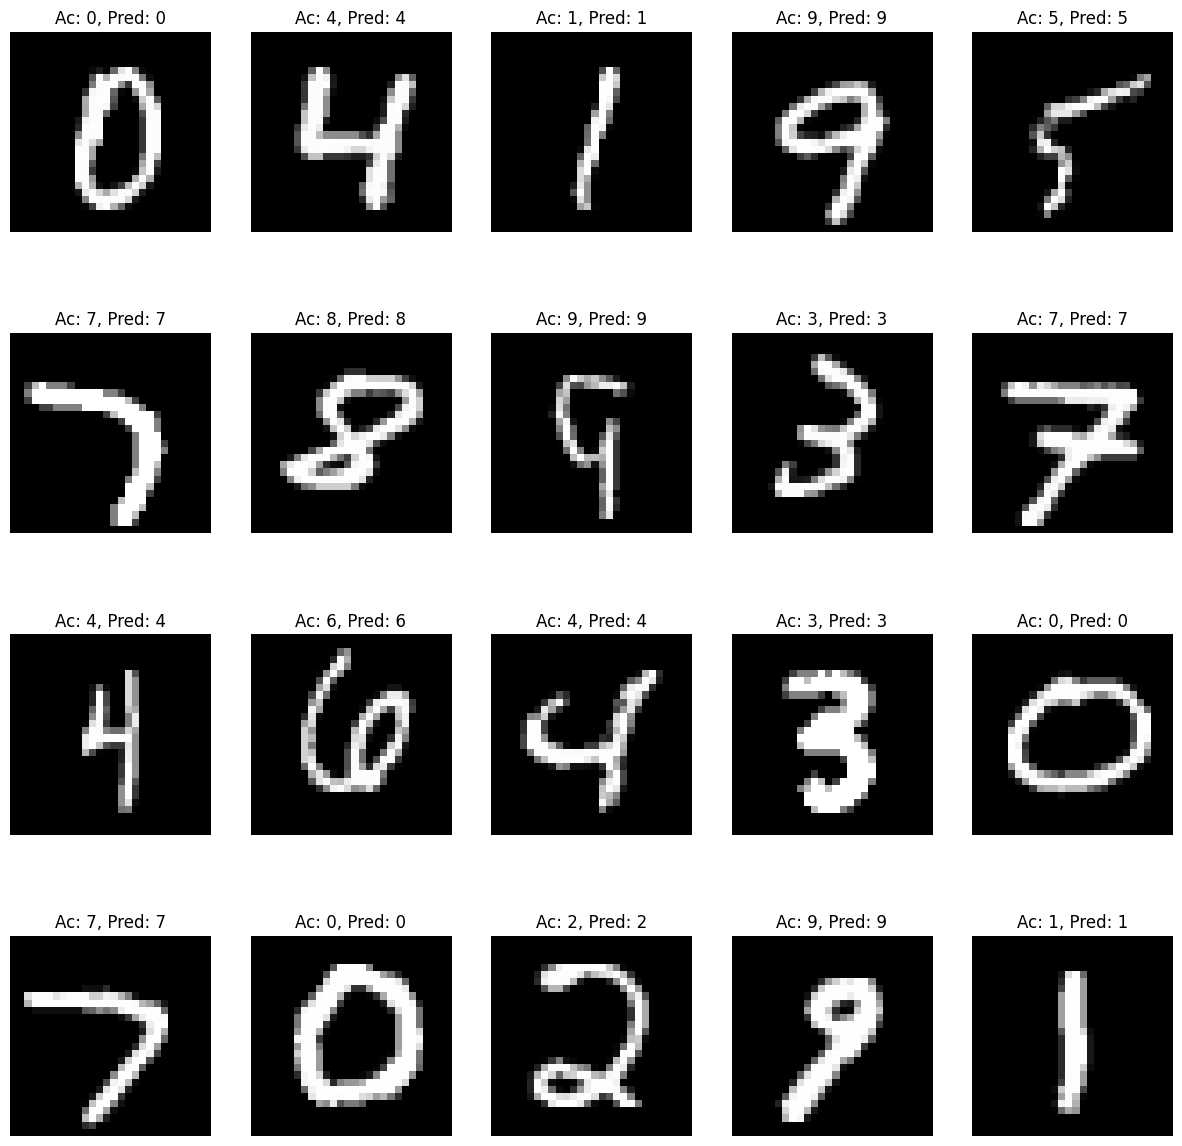

In [ ]:
plt.figure(figsize=(15, 15))
for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.imshow(test_x[i+55], cmap='gray')
    plt.title(f"Ac: {test_y[i+55]}, Pred: {y_pred[i+55]}")
    plt.axis('off')
plt.show()

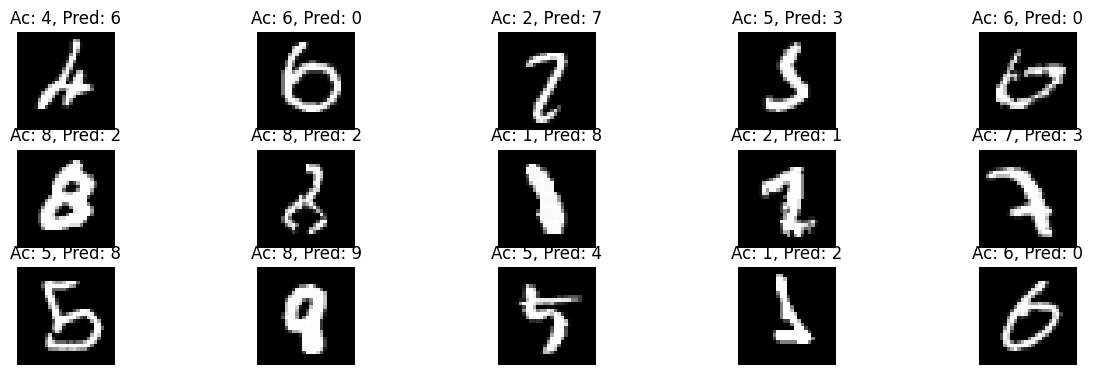

In [ ]:
plt.figure(figsize=(15, 15))
count = 0  # Initialize a counter for the number of plotted images
max_plots = 50 # Set the maximum number of plots

for i in range(1000):
  if test_y[i] != y_pred[i]:
    if count < max_plots: # Check if the limit has been reached
      plt.subplot(10 , 5 , count + 1)
      plt.imshow(test_x[i], cmap='gray')
      plt.title(f"Ac: {test_y[i]}, Pred: {y_pred[i]}")
      plt.axis('off')
      count += 1 # Increment the counter
    else:
      break # Exit the loop if the limit is reached

plt.show()

Image loaded and preprocessed successfully.
Shape of preprocessed image: (1, 784)
The predicted digit is: 0


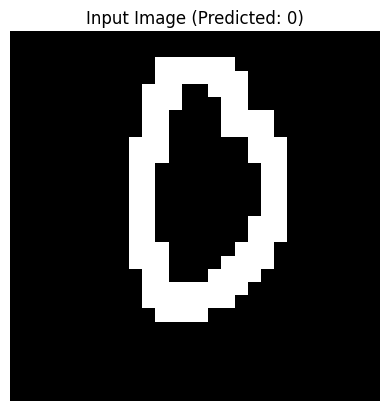

In [ ]:
from PIL import Image
import numpy as np

# Replace 'your_image.png' with the name of the image file you uploaded
image_path = 'digit_0.png'

# Open the image
try:
    img = Image.open(image_path).convert('L')  # Convert to grayscale ('L')
except FileNotFoundError:
    print(f"Error: The file '{image_path}' was not found.")
    # Handle the error appropriately, maybe exit or ask for a valid file
    exit() # Example: Exit the script if file not found

# Resize the image to 28x28 pixels
img = img.resize((28, 28))

# Convert the image to a numpy array
img_array = np.array(img)

# Flatten the image array to a 1D array (28*28 = 784)
# MNIST images were flattened for your model
img_flattened = img_array.reshape(1, -1) # Reshape to (1, 784)

# Normalize the pixel values
img_normalized = img_flattened / 255.0

# Now 'img_normalized' is ready to be fed into your model
print("Image loaded and preprocessed successfully.")
print("Shape of preprocessed image:", img_normalized.shape)
prediction = predict(img_normalized, w1, b1, w2, b2)

# The prediction will be a numpy array containing the predicted digit (0-9)
predicted_digit = prediction[0]

print(f"The predicted digit is: {predicted_digit}")

# You can also display the image you loaded to verify
import matplotlib.pyplot as plt

plt.imshow(img_array, cmap='gray')
plt.title(f"Input Image (Predicted: {predicted_digit})")
plt.axis('off')
plt.show()

The predicted digit is: 9


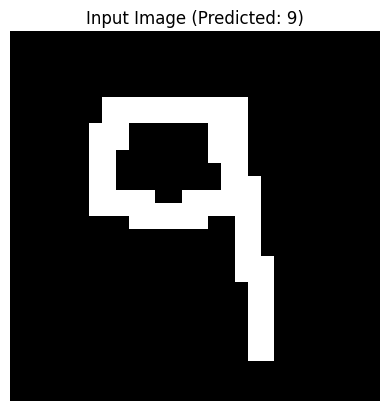

In [ ]:
# Assuming you have already trained your model and have the weights and biases
# (w1, b1, w2, b2) available from your gradient_des_mini_batch function call

# Make a prediction using your predict function
prediction = predict(img_normalized, w1, b1, w2, b2)

# The prediction will be a numpy array containing the predicted digit (0-9)
predicted_digit = prediction[0]

print(f"The predicted digit is: {predicted_digit}")

# You can also display the image you loaded to verify
import matplotlib.pyplot as plt

plt.imshow(img_array, cmap='gray')
plt.title(f"Input Image (Predicted: {predicted_digit})")
plt.axis('off')
plt.show()